## Introduction

In this notebook we try to study the data of CO2 emmissions in Europe and try to answer some pressing questions. 
//TODO: Explain the dataset data and explain why the dataset was chosen.

## Step 1. Get the data
The data are stored into a csv file called owid-co-2data . This file contains the information of CO2 emissions for every (most) country in the world. There are also aggregated data for the continents.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

#path might be edited depending on the notebook
df = pd.read_csv('/kaggle/input/co2-data/owid-co2-data.csv')

## Step 2. Explore the data

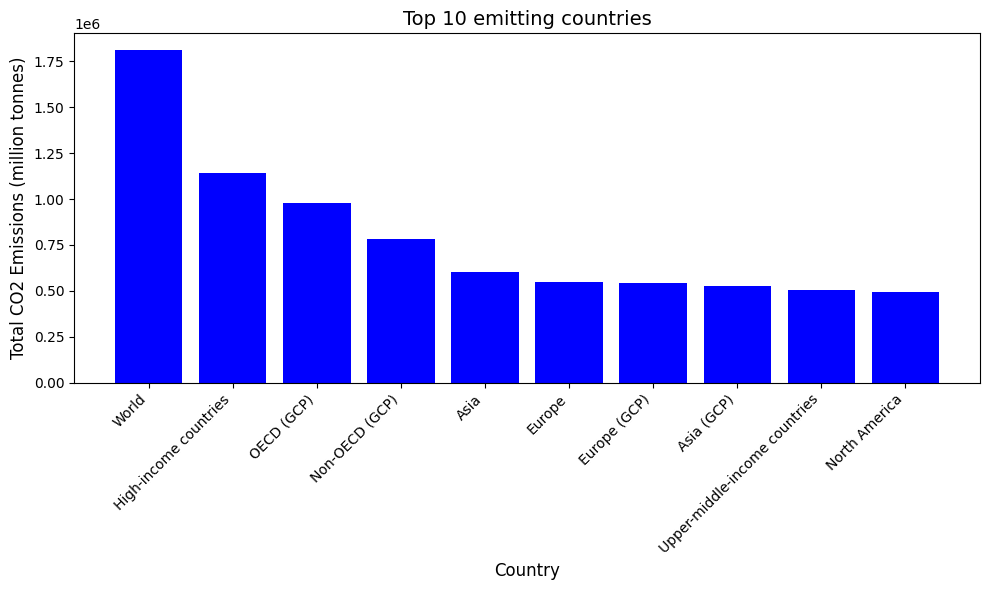

In [2]:
total_emissions = df.groupby('country')['co2'].sum().reset_index()

# Sort the countries by total CO2 emissions in descending order
total_emissions = total_emissions.sort_values(by='co2', ascending=False).reset_index(drop=True)

# Display the top 10 emitting countries
top_emitters = total_emissions.head(10)


plt.figure(figsize=(10, 6))
plt.bar(top_emitters['country'], top_emitters['co2'], color='blue')
plt.title('Top 10 emitting countries', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total CO2 Emissions (million tonnes)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

We see that we also have data related to the continents and other entities or groups. Since we're focusing on Europe , the Europe data will be very useful.

### How is the level of carbon emission in Europe evolving?
As mentioned before , we only need the data for the countries of Europe.As we saw above, in our data we see that we have in the country column aggregates for each continent. In our case we need the ones for Europe. We'll use the 'year' and the 'co2' column to create a plot with matplotlib.

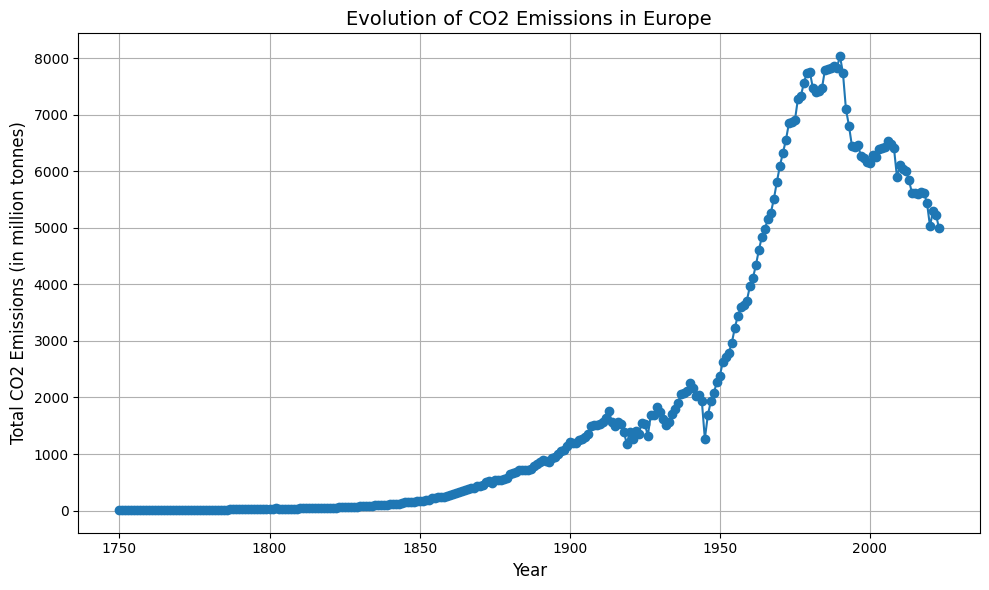

In [3]:

europe_aggregate_data = df[df['country'] == 'Europe']

# Dropping years that have no data
europe_emission_trend_aggregate = europe_aggregate_data[['year', 'co2']].dropna()

# Plot the trend for the aggregate data
plt.figure(figsize=(10, 6))
plt.plot(europe_emission_trend_aggregate['year'], europe_emission_trend_aggregate['co2'], marker='o', linestyle='-')
plt.title('Evolution of CO2 Emissions in Europe', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total CO2 Emissions (in million tonnes)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

To see that the data is the same , we can manually aggregate the data and we expect to see the same result.

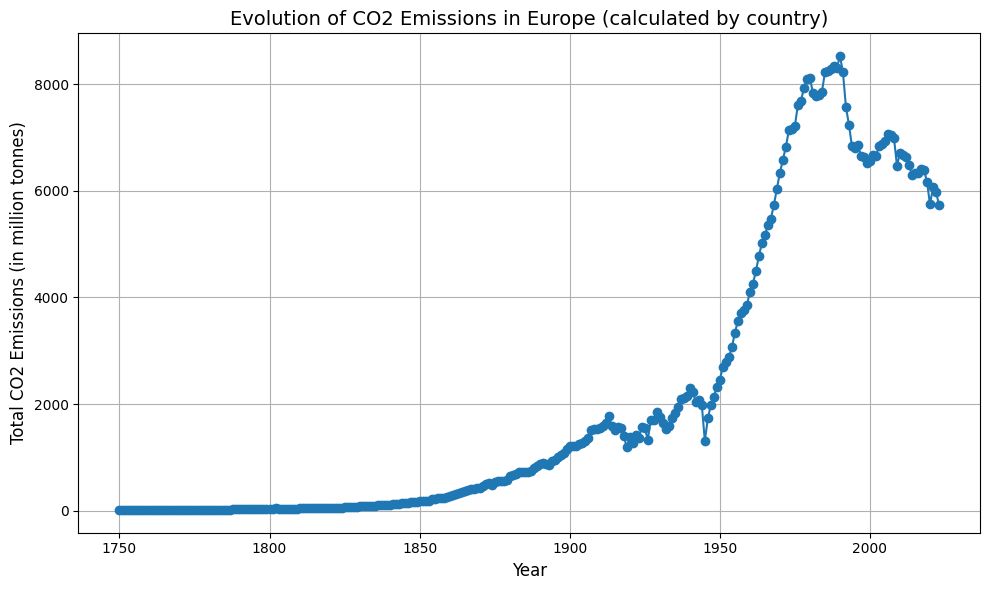

In [4]:
european_countries = [
    "Albania", "Andorra", "Armenia", "Austria", "Azerbaijan", "Belarus", "Belgium",
    "Bosnia and Herzegovina", "Bulgaria", "Croatia", "Cyprus", "Czechia", "Denmark",
    "Estonia", "Finland", "France", "Georgia", "Germany", "Greece", "Hungary", "Iceland",
    "Ireland", "Italy", "Kazakhstan", "Kosovo", "Latvia", "Liechtenstein", "Lithuania",
    "Luxembourg", "Malta", "Moldova", "Monaco", "Montenegro", "Netherlands", "North Macedonia",
    "Norway", "Poland", "Portugal", "Romania", "Russia", "San Marino", "Serbia",
    "Slovakia", "Slovenia", "Spain", "Sweden", "Switzerland", "Turkey", "Ukraine",
    "United Kingdom", "Vatican City"
]

# Filter the dataset for European countries
europe_data = df[df['country'].isin(european_countries)]

europe_emission_trend = europe_data.groupby('year')['co2'].sum().reset_index()

# Plot the trend
plt.figure(figsize=(10, 6))
plt.plot(europe_emission_trend['year'], europe_emission_trend['co2'], marker='o', linestyle='-')
plt.title('Evolution of CO2 Emissions in Europe (calculated by country)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total CO2 Emissions (in million tonnes)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

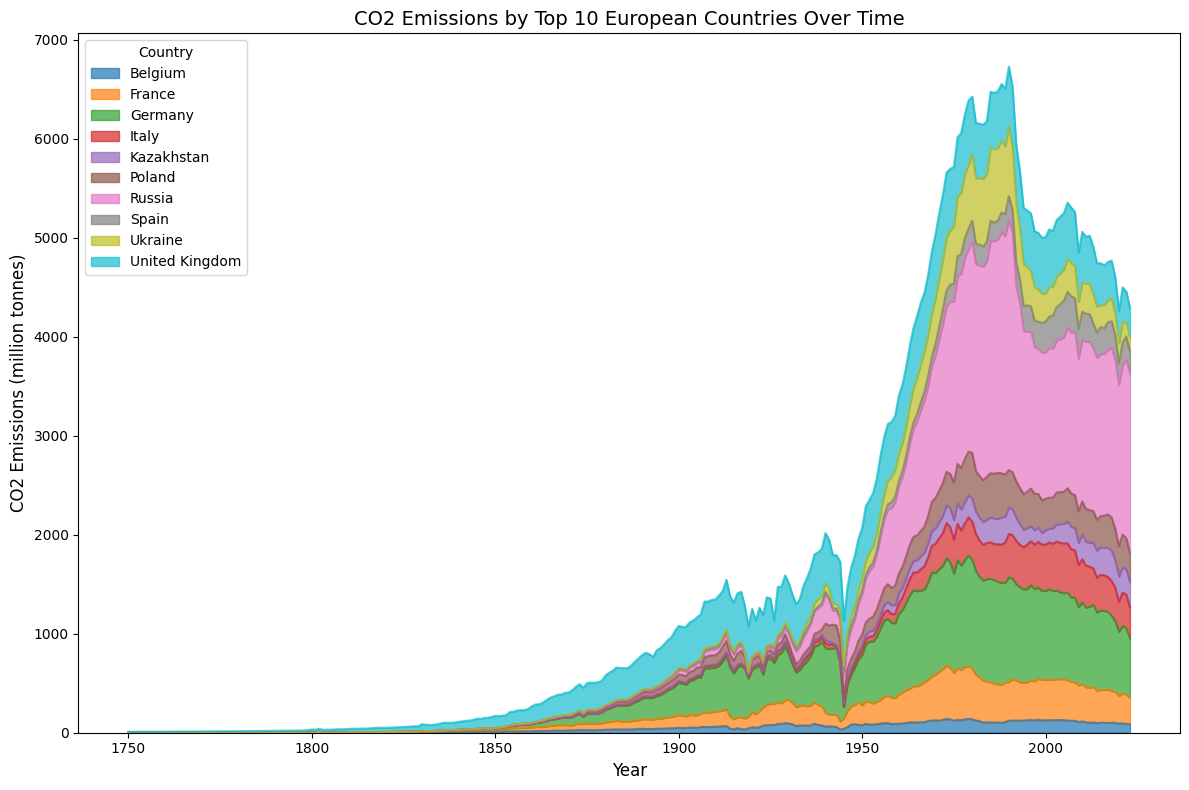

In [5]:
# Calculate total emissions by country in Europe
europe_total_emissions = europe_data.groupby('country')['co2'].sum().reset_index()
europe_total_emissions = europe_total_emissions.sort_values(by='co2', ascending=False).reset_index(drop=True)

# Get the top 10 countries by emissions
top_10_countries = europe_total_emissions['country'].head(10)

# Filter the data for only the top 10 countries
top_10_data = europe_data[europe_data['country'].isin(top_10_countries)]

# Prepare data for stacked area chart
top_10_trend = top_10_data.pivot_table(index='year', columns='country', values='co2', aggfunc='sum').fillna(0)

# Plot the stacked area chart
top_10_trend.plot(kind='area', stacked=True, figsize=(12, 8), alpha=0.7)
plt.title('CO2 Emissions by Top 10 European Countries Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('CO2 Emissions (million tonnes)', fontsize=12)
plt.legend(loc='upper left', fontsize=10, title='Country')
plt.tight_layout()
plt.show()

We see a sharp increase in the middle of 20th century. The expansion of manufacturing industries and the widespread adoption of fossil fuels, particularly coal and oil,after WW2,probably drove this increase. After the 1990s gradual decline in emissions is apparent.European countries began adopting strict environmental policies and EU-wide regulations to reduce greenhouse gases.

### Which countries are emitting and absorbing the most carbon?

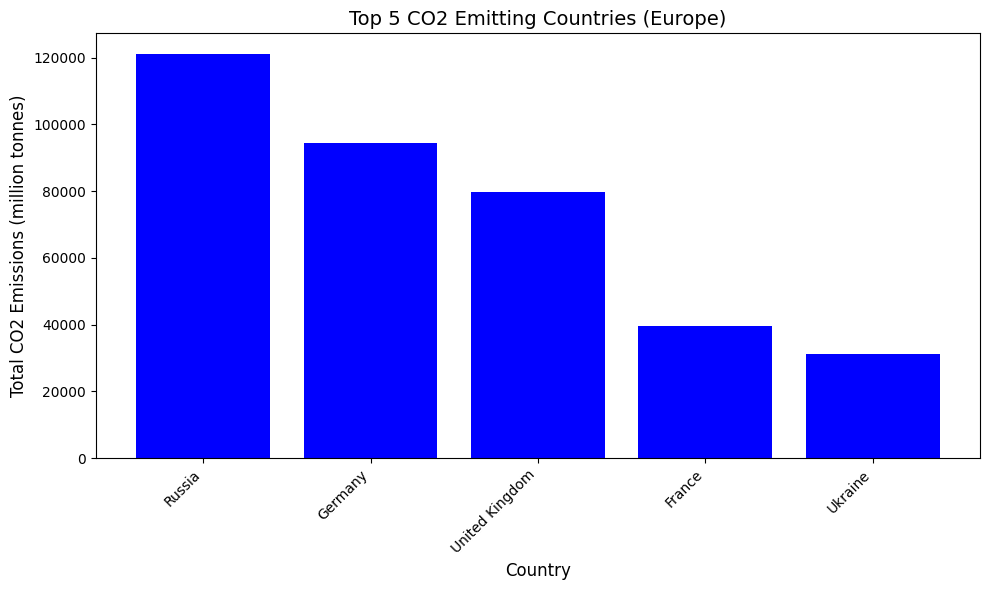

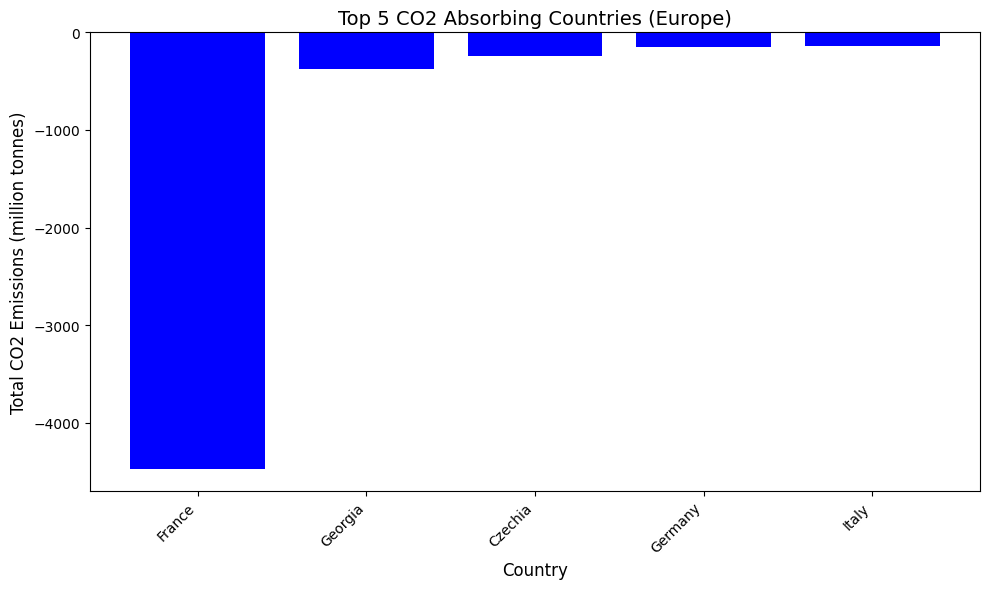

In [6]:
# Calculate total emissions by country in Europe
europe_emissions = europe_data.groupby('country')['co2'].sum().reset_index()
europe_emissions = europe_emissions.sort_values(by='co2', ascending=False).reset_index(drop=True)

# Calculate total absorption by country (land_use_change_co2) in Europe
europe_absorption = europe_data.groupby('country')['land_use_change_co2'].sum().reset_index()
europe_absorption = europe_absorption[europe_absorption['land_use_change_co2'] < 0] # keep only countries with negative values 
europe_absorption = europe_absorption.sort_values(by='land_use_change_co2').reset_index(drop=True)

# Bar chart visualization for emissions
plt.figure(figsize=(10, 6))
plt.bar(europe_emissions.head(5)['country'], europe_emissions.head(5)['co2'], color='blue')
plt.title('Top 5 CO2 Emitting Countries (Europe)', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total CO2 Emissions (million tonnes)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

# Bar chart visualization for absorbers
plt.figure(figsize=(10, 6))
plt.bar(europe_absorption.head(5)['country'], europe_absorption.head(5)['land_use_change_co2'], color='blue')
plt.title('Top 5 CO2 Absorbing Countries (Europe)', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total CO2 Emissions (million tonnes)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

We see that larger countries or wealthier nations are at the top of the table for emitting CO2. However , most of these countries are also at the top of the absorbing list. We can do a similar thing for 'co2_per_capita' and 'co2_per_gdp' , and see if we find any differences.

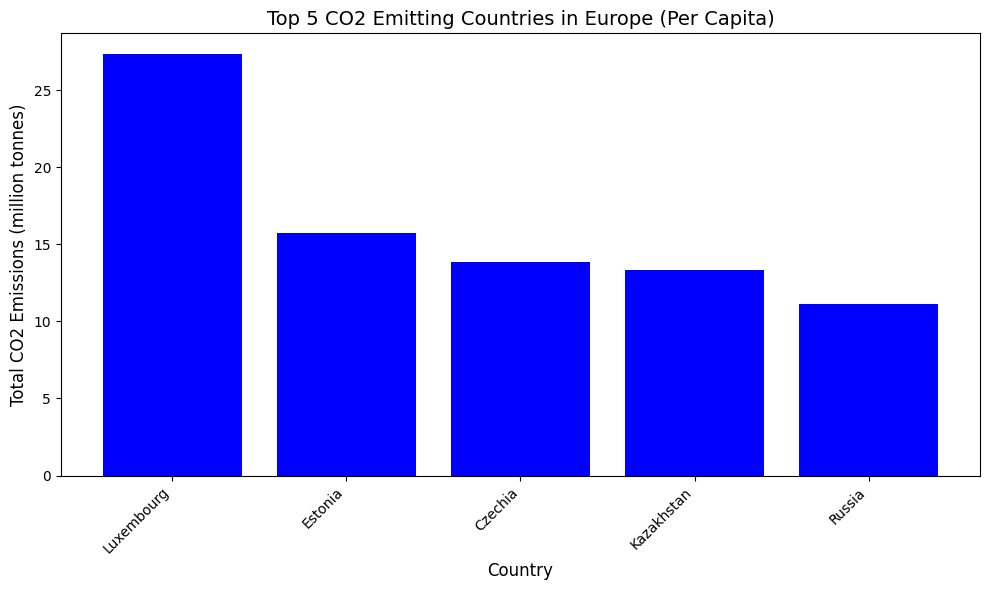

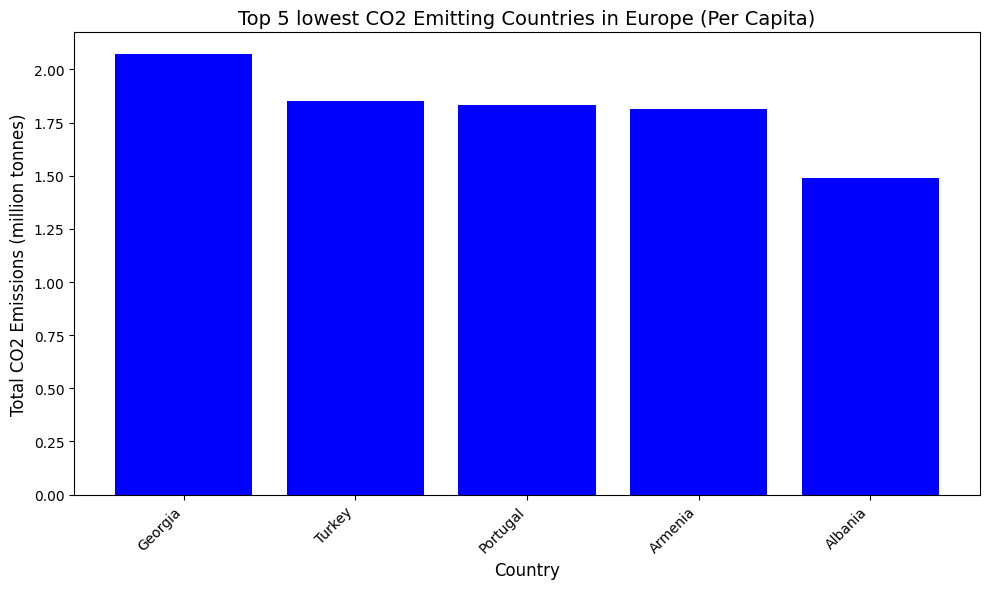

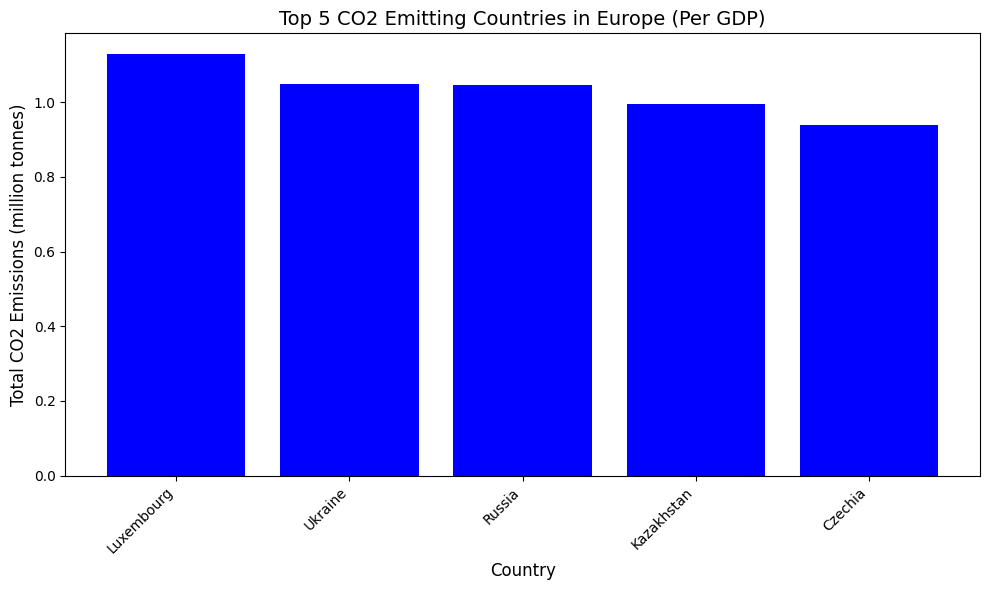

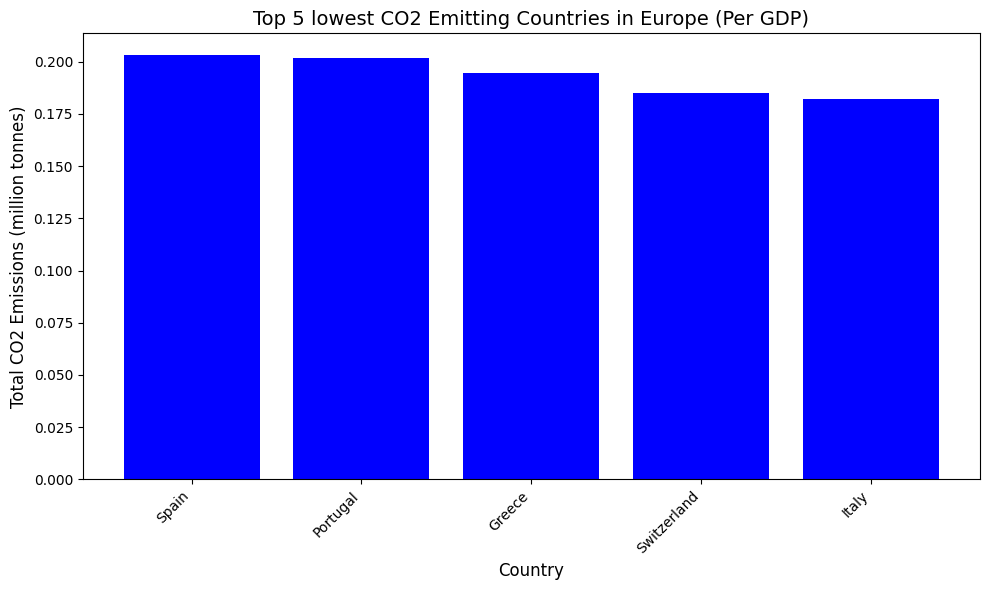

In [7]:
# Drop rows with missing data for `co2_per_capita` or `co2_per_gdp`
europe_data = europe_data.dropna(subset=['co2_per_capita', 'co2_per_gdp'])

# Aggregate to find average values per country
europe_co2_stats = europe_data.groupby('country').agg({
    'co2': 'sum',
    'population': 'mean',
    'gdp': 'mean',
    'co2_per_capita': 'mean',
    'co2_per_gdp': 'mean'
}).reset_index()

# Sort by CO2 per capita and per GDP
sorted_by_per_capita = europe_co2_stats.sort_values(by='co2_per_capita', ascending=False)
sorted_by_per_gdp = europe_co2_stats.sort_values(by='co2_per_gdp', ascending=False)

# Bar chart visualization for emitting countries by population
plt.figure(figsize=(10, 6))
plt.bar(sorted_by_per_capita.head(5)['country'], sorted_by_per_capita.head(5)['co2_per_capita'], color='blue')
plt.title('Top 5 CO2 Emitting Countries in Europe (Per Capita)', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total CO2 Emissions (million tonnes)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(sorted_by_per_capita.tail(5)['country'], sorted_by_per_capita.tail(5)['co2_per_capita'], color='blue')
plt.title('Top 5 lowest CO2 Emitting Countries in Europe (Per Capita)', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total CO2 Emissions (million tonnes)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

# Bar chart visualization for emitting countries by GDP
plt.figure(figsize=(10, 6))
plt.bar(sorted_by_per_gdp.head(5)['country'], sorted_by_per_gdp.head(5)['co2_per_gdp'], color='blue')
plt.title('Top 5 CO2 Emitting Countries in Europe (Per GDP)', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total CO2 Emissions (million tonnes)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(sorted_by_per_gdp.tail(5)['country'], sorted_by_per_gdp.tail(5)['co2_per_gdp'], color='blue')
plt.title('Top 5 lowest CO2 Emitting Countries in Europe (Per GDP)', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total CO2 Emissions (million tonnes)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

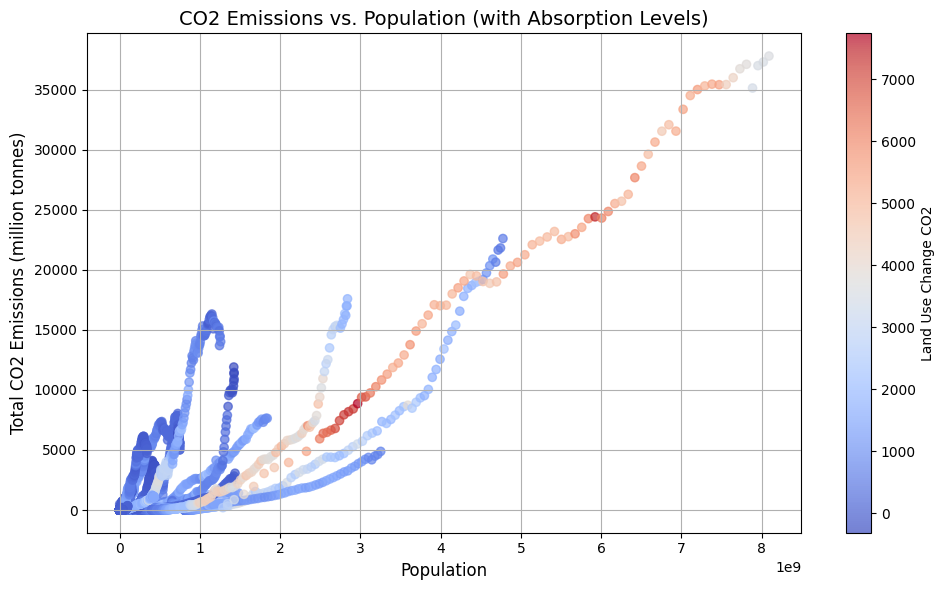

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(df['population'], df['co2'], c=df['land_use_change_co2'], cmap='coolwarm', alpha=0.7)
plt.title('CO2 Emissions vs. Population (with Absorption Levels)', fontsize=14)
plt.xlabel('Population', fontsize=12)
plt.ylabel('Total CO2 Emissions (million tonnes)', fontsize=12)
plt.colorbar(label='Land Use Change CO2')
plt.grid(True)
plt.tight_layout()
plt.show()

The 'co2_per_capita' measures the amount of CO2 emissions produced per individual in a country.As expected countries with low population tend to rank high in this rankings. Ukraine and Turkey , for example, have relatively low per capita emissions due to their larger populations, even if total emissions are high.**

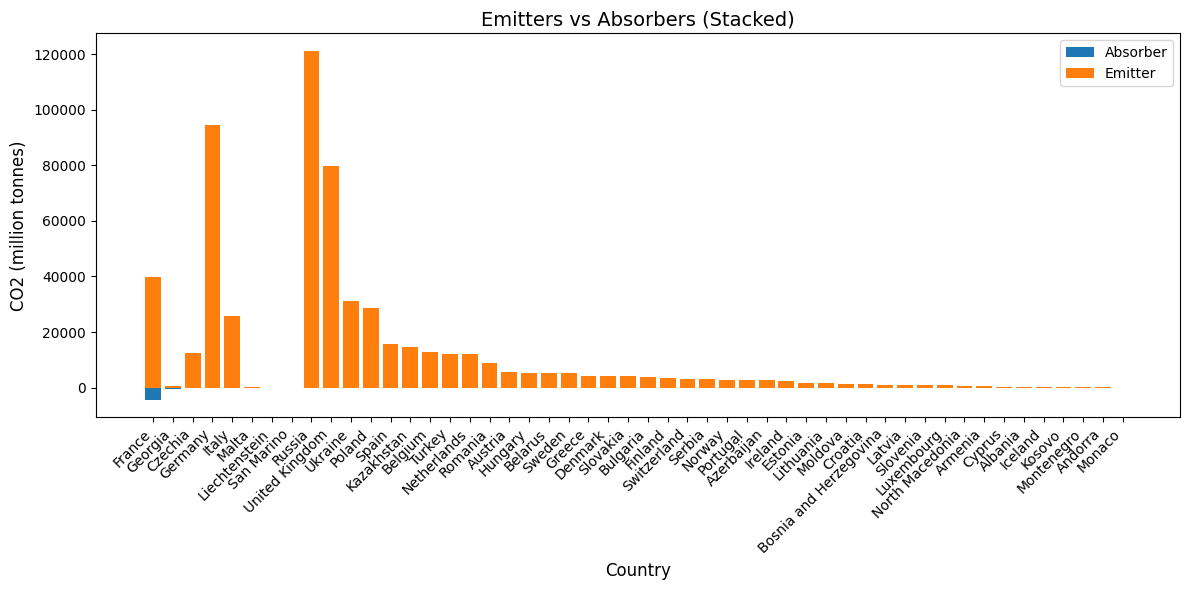

In [9]:
# Combine emitters and absorbers into one dataset
europe_emissions['type'] = 'Emitter'
europe_absorption['type'] = 'Absorber'
comparison = pd.concat([europe_emissions, europe_absorption.rename(columns={'land_use_change_co2': 'co2'})])

# Stacked bar chart
plt.figure(figsize=(12, 6))
for label, group in comparison.groupby('type'):
    plt.bar(group['country'], group['co2'], label=label)
plt.title('Emitters vs Absorbers (Stacked)', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('CO2 (million tonnes)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

### Are there differences when considering all carbon ever emitted by a country?

This section explores the differences in CO2 emissions at a both country and continental scale analyzing overall cumulative CO2 emissions and absolute emissions growth over the recorded years.


In [10]:
# defining custom color palettes for chart visualizations

custom_red_palette = [
    '#ffffff',  # White for lowest values
    '#ffcccc',  # Light red
    '#ff9999',  # Soft pinkish red
    '#ff6666',  # Regular red
    '#ff3333',  # Strong red
    '#ff0000',  # Pure red
    '#cc0000',  # Darker red
    '#990000',  # Deep crimson
]

custom_green_palette = [
    '#194d19',  # Deep dark green
    '#267326',  # Dark green
    '#339933',  # Forest green
    '#4db84d',  # Medium green
    '#80cc80',  # Light green
    '#b3e6b3',  # Soft green
    '#e6f9e6',  # Very light green
]

In [11]:
# excluding regional and aggregate data
excluded_countries = ['Africa', 'Africa (GCP)', 'Asia', 'Asia (GCP)', 'Asia (excl. China and India)' , 
                      'Central America (GCP)' , 'Europe', 'Europe (GCP)', 'Europe (excl. EU-27)', 
                      'Europe (excl. EU-28)', 'European Union (27)', 'European Union (28)' , 
                      'High-income countries' , 'International aviation', 'International shipping', 
                      'International transport' , 'Kuwaiti Oil Fires (GCP)' , 'Kuwaiti Oil Fires' , 
                      'Least developed countries (Jones et al.)' , 'Low-income countries' , 
                      'Lower-middle-income countries' , 'Middle East (GCP)' , 'Non-OECD (GCP)' , 
                      'North America', 'North America (GCP)' , 'North America (excl. USA)' , 
                      'OECD (GCP)', 'OECD (Jones et al.)' ,'Oceania', 'Oceania (GCP)' , 'Ryukyu Islands (GCP)' , 
                      'South America' , 'South America (GCP)' , 'Upper-middle-income countries' , 'World']
df_cleaned = df[~df['country'].isin(excluded_countries)]

# filter the data for the year 2023
df_2023 = df_cleaned[df_cleaned['year'] == 2023]

# select relevant columns
country_co2_2023 = df_2023[['country', 'cumulative_co2']].reset_index(drop=True)

# choropleth map for visualizing the cumulative co2 emissions
fig = px.choropleth(country_co2_2023, 
                    locations='country', 
                    locationmode='country names', 
                    color='cumulative_co2', 
                    hover_name='country', 
                    color_continuous_scale= custom_red_palette, 
                    title='Cumulative CO2 Emissions by Country in 2023',
                    labels={'cumulative_co2': 'Cumulative CO2 Emissions (Million Tonnes)'})

fig.update_geos(
    showcoastlines=True, 
    coastlinecolor="Black", 
    showland=True, 
    landcolor="white",
    showframe=False,  # Removes the border frame for better aesthetics
    projection_type="natural earth"  # Ensures a natural Earth projection
)

# Adjust the layout for a larger and clearer map
fig.update_layout(
    title_font_size=20,  # Increase title font size for clarity
    margin={"r":50, "t":50, "l":50, "b":50},  # Set reasonable margins
    width=1200,  # Increase the width of the figure
    height=800  # Increase the height of the figure
)
fig.show()


Cumulative CO2 represents the total amount of CO2 emitted over time for each country. The choropleth map shows the cumulative CO2 emissions for each country for the year 2023. The countries are shaded in red, the intensity of which varies according to their total emissions as shown on the color hue on the right of the map. 

Countries with darker shades of red such as USA, China, Russia are not only major countries, but highly industrial. Whereas countries shaded very lightly represent countries usually with smaller economies and industrial activities.

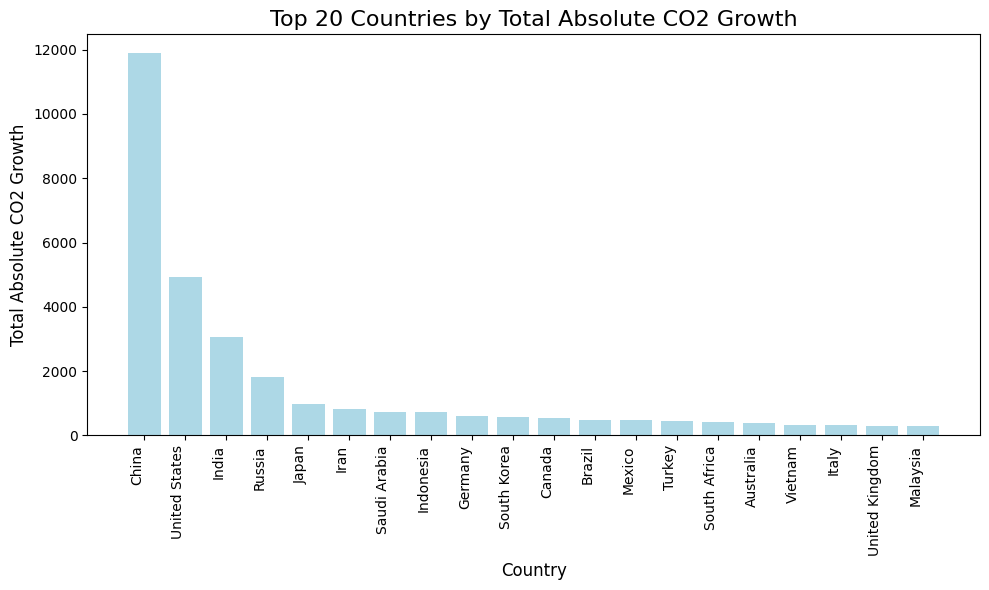

In [12]:
# summation of the absolute co2 growth over the recorded years
growth_by_year_abs = df_cleaned.groupby('country')['co2_growth_abs'].sum().reset_index()

# sorting absolute co2 growth
growth_by_year_abs = growth_by_year_abs.sort_values(by='co2_growth_abs', ascending=False)

# bar chart for visualializing absolute growth
plt.figure(figsize=(10, 6))
plt.bar(growth_by_year_abs['country'].head(20), growth_by_year_abs['co2_growth_abs'].head(20), color='lightblue')

plt.title('Top 20 Countries by Total Absolute CO2 Growth', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Absolute CO2 Growth', fontsize=12)
plt.xticks(rotation=90, ha='right') 
plt.tight_layout()

plt.show()

The absolute CO2 growth is the difference between the current and the previous year's CO2 emissions. While cumulative CO2 emissions show historically high numbers emitted by very big countries, the sum of absolute growth helps us identify which countries yield the highest increases in emissions over the years. This provides another view depicting countries with the largest growth regardless of their size.

In [13]:
# including only continents 
included_regions = ['Africa','Antarctica','Asia', 'Europe','North America', 'Oceania', 'South America']

# filtering data 
df_2023_regional = df[(df['year'] == 2023) & (df['country'].isin(included_regions))]

# retrieving the cumulative co2 emissions of the world and for each of the regions for year 2023
world_cumulative_co2_2023 = df[(df['country'] == 'World') & (df['year'] == 2023)]['cumulative_co2'].iloc[0]
regional_cumulative_co2 = df_2023_regional[['country', 'cumulative_co2']].reset_index(drop=True)

# calculating the impact on global co2 emissions
regional_cumulative_co2['impact_percentage'] = (regional_cumulative_co2['cumulative_co2'] / world_cumulative_co2_2023) * 100

# building pie chart
fig = px.pie(
    regional_cumulative_co2,
    names='country',
    values='impact_percentage',
    title='Continental Impact on World Cumulative CO2 Emissions',
    color_discrete_sequence=custom_green_palette
)

# layout customization
fig.update_traces(textinfo='percent+label', pull=[0.1 if i == 0 else 0 for i in range(len(regional_cumulative_co2))])
fig.update_layout(
    title_font_size=16,
    margin={"r":0,"t":60,"l":0,"b":0},
)

fig.show()


The pie chart visualizes the impact of the cumulative CO2 emissions of each continent on the global cumulative CO2 emissions in 2023. Asia accounts for 34% making it the largest contributor to the global cumulative CO2 emissions. Antarctica on the other side has a negligible contribution of less that 1% highlighting its lack of industrial activities.

## Step 3. Predictions

### Are there characteristics of countries that correlate with the changes in the carbon emissions?

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV

In [15]:
# Attributes and target variable
attributes = [
    "population", # Population of the country
    "gdp", # Gross Domestic Product of the country
    "primary_energy_consumption", # Primary energy consumption
    "cement_co2", # Annual CO₂ emissions from cement
    "cement_co2_per_capita", # CO₂ emissions from cement per capita
    "coal_co2", # Annual CO₂ emissions from coal
    "coal_co2_per_capita", # CO₂ emissions from coal per capita
    "land_use_change_co2", # CO₂ emissions from land use change
    "land_use_change_co2_per_capita", # CO₂ emissions from land use change per capita
    "methane", # Annual methane emissions
    "methane_per_capita", # Methane emissions per capita
    "oil_co2", # Annual CO₂ emissions from oil
    "oil_co2_per_capita", # CO₂ emissions from oil per capita    
]
target = "co2"

# Copy europe data
model_data = europe_data.copy()

# Keep only the attributes and target
model_data = model_data[attributes + [target]]

### Correlation between picked attributes

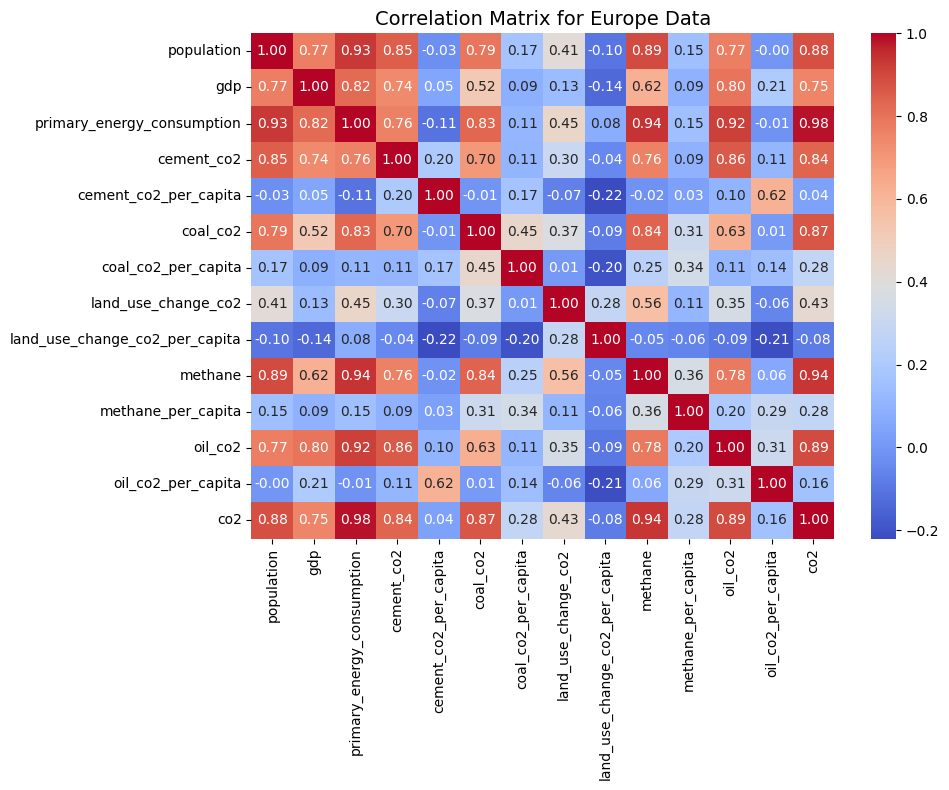

In [16]:
# Correlation matrix for europe_data
plt.figure(figsize=(10, 8))
sns.heatmap(model_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Europe Data', fontsize=14)
plt.tight_layout()
plt.show()

In [17]:
attributes_to_drop = [
    "primary_energy_consumption",
    "methane"
]

# Remove highly correlated features
model_data_2 = model_data.drop(columns=attributes_to_drop)

# Remove attibutes from the list
attributes = [attr for attr in attributes if attr not in attributes_to_drop]

In [18]:
# Drop rows with missing target
model_data_2 = model_data_2.dropna(subset=[target])

# Fill missing attributes with mean of the 2 years in between
model_data_2[attributes] = model_data_2[attributes].interpolate(limit_direction='both')

X = model_data_2[attributes]
y = model_data_2[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Min-max scaling using sklearn
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
best_model = RandomForestRegressor(
    n_estimators=200,
    min_samples_split=2,
    min_samples_leaf=1,
    max_depth=None,
    random_state=42
)

# Fit the model
best_model.fit(X_train_scaled, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [21]:
# Predictions
y_pred = best_model.predict(X_test_scaled)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

MAE: 3.810425842274671
MSE: 152.31323564363538
RMSE: 12.341524850829227


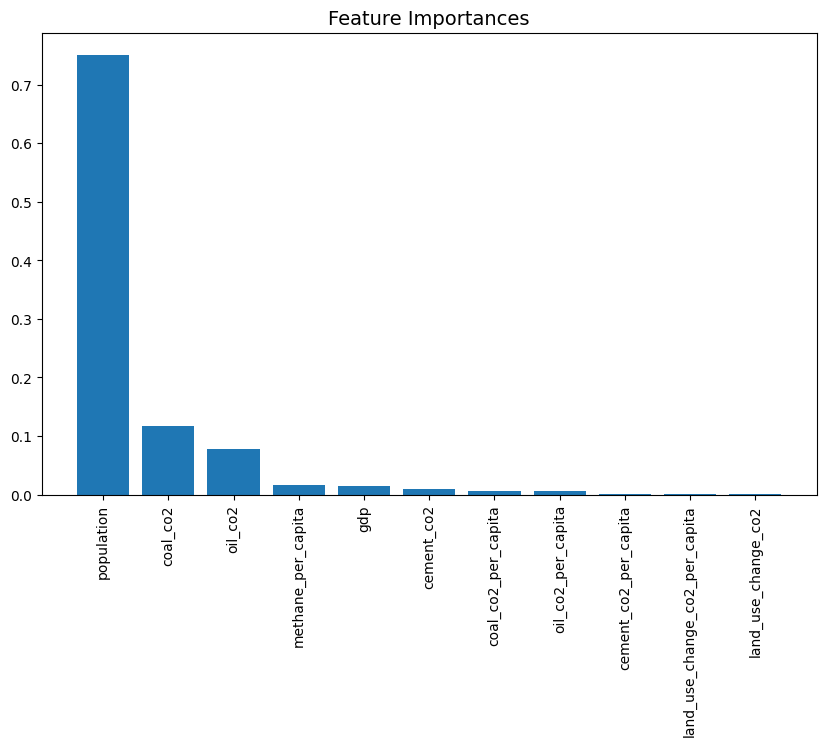

In [22]:
# Get feature importances
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(len(attributes)), importances[indices], align='center')
plt.xticks(range(len(attributes)), [attributes[i] for i in indices], rotation=90)
plt.title('Feature Importances', fontsize=14)
plt.show()

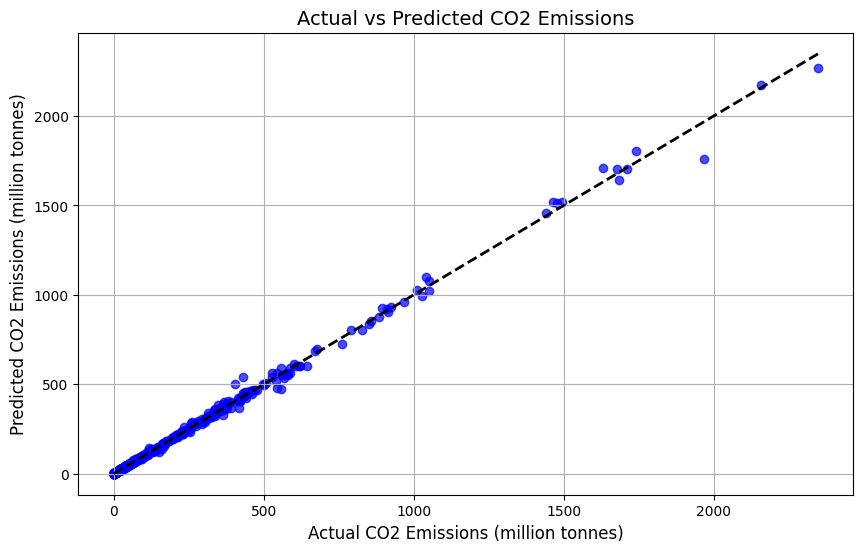

In [23]:
# Predictions vs Actual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, c='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual CO2 Emissions (million tonnes)', fontsize=12)
plt.ylabel('Predicted CO2 Emissions (million tonnes)', fontsize=12)
plt.title('Actual vs Predicted CO2 Emissions', fontsize=14)
plt.grid(True)
plt.show()

### Population vs CO2 emissions

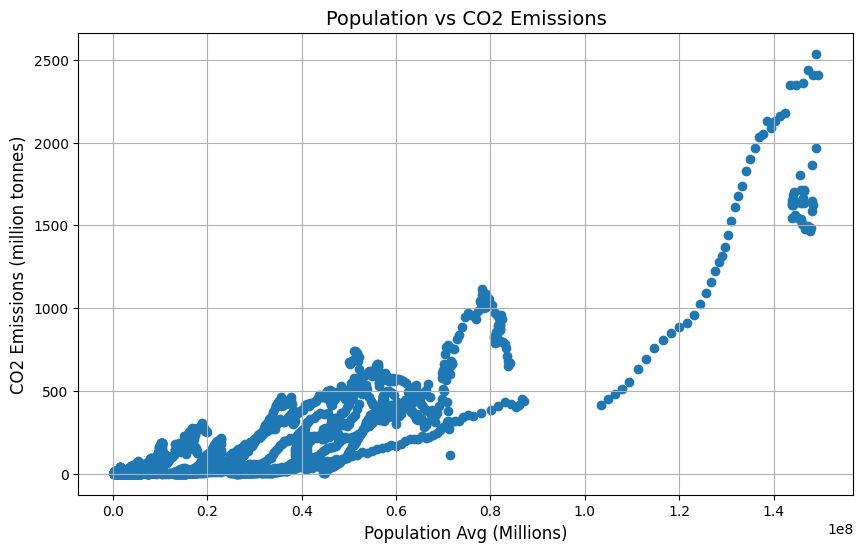

In [24]:
population_millions = europe_data['population']
co2_emissions = europe_data['co2']

plt.figure(figsize=(10, 6))
plt.scatter(population_millions, co2_emissions)
plt.title('Population vs CO2 Emissions', fontsize=14)
plt.xlabel('Population Avg (Millions)', fontsize=12)
plt.ylabel('CO2 Emissions (million tonnes)', fontsize=12)
plt.grid(True)
plt.show()

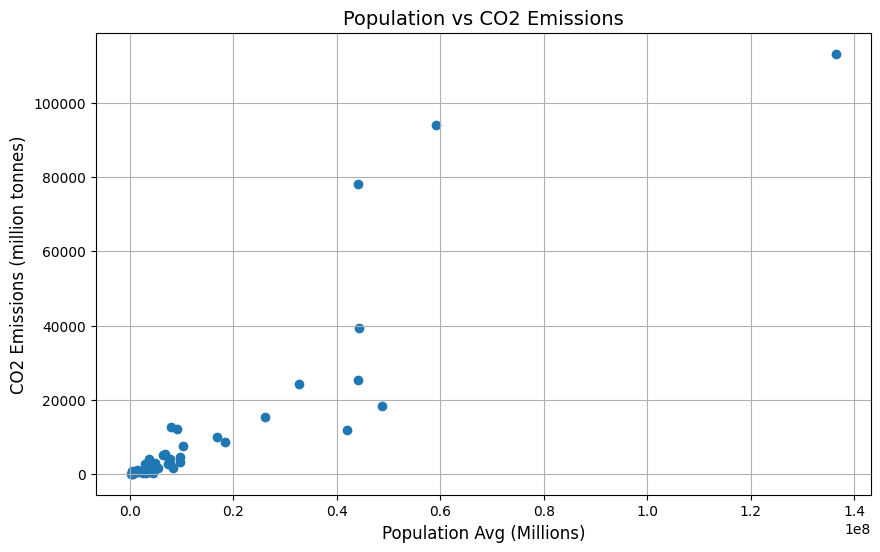

In [25]:
# Population in millions by country 
population_millions = europe_data.groupby('country')['population'].mean()
co2_emissions = europe_data.groupby('country')['co2'].sum()

plt.figure(figsize=(10, 6))
plt.scatter(population_millions, co2_emissions)
plt.title('Population vs CO2 Emissions', fontsize=14)
plt.xlabel('Population Avg (Millions)', fontsize=12)
plt.ylabel('CO2 Emissions (million tonnes)', fontsize=12)
plt.grid(True)
plt.show()

In [26]:
combined_population_vs_co2_data = pd.DataFrame({
    "population_millions": population_millions,
    "co2_emissions": co2_emissions
})

sorted_data_by_co2 = combined_population_vs_co2_data.sort_values(by="co2_emissions", ascending=False)

print(sorted_data_by_co2[:5])

sorted_data_by_population = combined_population_vs_co2_data.sort_values(by="population_millions", ascending=False)

print(sorted_data_by_population[:5])

                population_millions  co2_emissions
country                                           
Russia                 1.363731e+08     113187.767
Germany                5.922548e+07      93953.898
United Kingdom         4.398586e+07      78017.149
France                 4.423687e+07      39385.302
Italy                  4.406807e+07      25391.831
         population_millions  co2_emissions
country                                    
Russia          1.363731e+08     113187.767
Germany         5.922548e+07      93953.898
Ukraine         4.863760e+07      18353.695
France          4.423687e+07      39385.302
Italy           4.406807e+07      25391.831


## Conclusions
TODO: Talk about 
difficulties in analysing the dat,?wWhat were the key insights obtaine andsw Which Data Science tools and techniques were learned
during this exerc.up?